In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_loan = pd.read_csv("C:\\Users\\rakes\\OneDrive\\Documents\\LendingCaseStudyData\\loan.csv")
df_colums = pd.read_excel("C:\\Users\\rakes\\OneDrive\\Documents\\LendingCaseStudyData\\Data_Dictionary.xlsx")

C:\Users\rakes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_colums #Column Definations

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [7]:
df_colums=df_colums.dropna(1,"all")#removing null collums

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/1948625304.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df_colums=df_colums.dropna(1,"all")#remove any nulls collums in the data


In [8]:
set(df_loan.columns) - set(df_colums["LoanStatNew"]) #difference in columns & columns defined data

{'total_rev_hi_lim', 'verification_status_joint'}

In [9]:
df_loan=df_loan.drop(['total_rev_hi_lim', 'verification_status_joint'],1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/4035648525.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop(['total_rev_hi_lim', 'verification_status_joint'],1)


In [10]:
df_loan=df_loan.dropna(1,how="all")

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/1065170344.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df_loan=df_loan.dropna(1,how="all")


In [11]:
df_loan.shape

(39717, 57)

In [12]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

<AxesSubplot:>

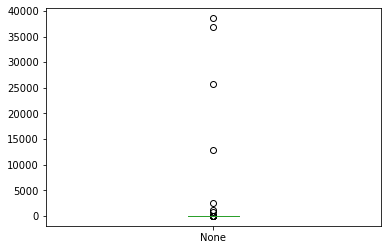

In [13]:
df_loan.isna().sum().plot.box() #to know how many columns are very hight null values

In [14]:
df_loan=df_loan.drop(['desc','mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],1) # droping all outliers in box plot

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/3156224900.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop(['desc','mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],1) # droping all outliers in box plot


In [15]:
df_loan=df_loan[~df_loan.pub_rec_bankruptcies.isna()]

In [16]:
df_loan=df_loan[~df_loan.emp_title.isna()]

In [17]:
df_loan = df_loan[~df_loan["emp_length"].isna()] # removing null values 

In [18]:
df_loan.isna().sum()[df_loan.isna().sum() > 0] 

title                          9
revol_util                    46
last_pymnt_d                  64
collections_12_mths_ex_med     2
chargeoff_within_12_mths       2
dtype: int64

In [19]:
df_loan.shape 

(36548, 53)

In [20]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [21]:
df_loan["id"]= df_loan["id"].astype('string')

In [22]:
df_loan["member_id"] = df_loan["member_id"].astype('string')

In [23]:
df_loan["loan_amnt"].describe()

count    36548.000000
mean     11294.866340
std       7435.395805
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


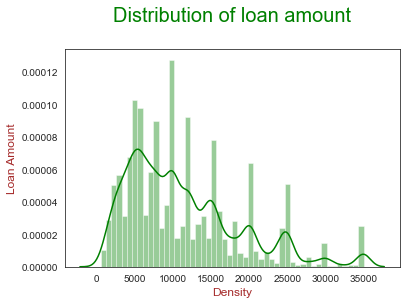

In [24]:
#ploting the graph 
sns.set_style("white")
sns.distplot(df_loan.loan_amnt, color="g")

# Labeling Axes
plt.xlabel("Density", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Adding and formatting title
plt.title("Distribution of loan amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

In [25]:
df_loan["funded_amnt"].describe()

count    36548.000000
mean     11020.644769
std       7168.173439
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [26]:
df_loan["loan_approval"] = df_loan["funded_amnt"]/df_loan["loan_amnt"]*100

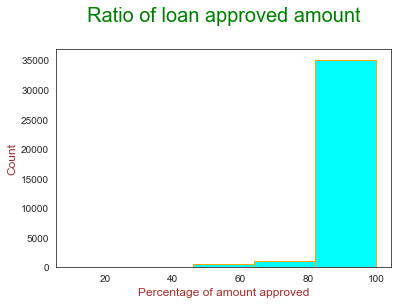

In [27]:
# plotting bar chart and setting bar width to 0.5 and aligning it to center
plt.hist(df_loan["loan_approval"], bins=5, align='mid', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Ratio of loan approved amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Percentage of amount approved", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [28]:
df_loan["funded_amnt_inv"].describe()

count    36548.000000
mean     10586.433390
std       7073.216233
min          0.000000
25%       5000.000000
50%       9175.000000
75%      14500.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [29]:
zero_inv=df_loan[df_loan["funded_amnt_inv"] == 0] # there are 129 row with 0

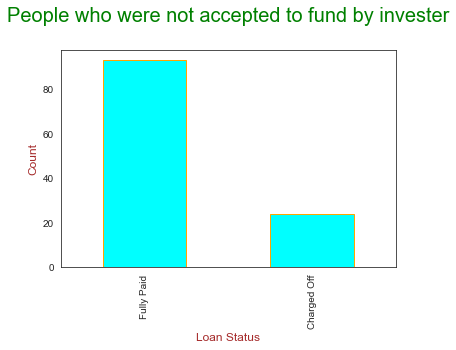

In [30]:
# plotting bar chart and setting bar width to 0.5 and aligning it to center
zero_inv.loan_status.value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("People who were not accepted to fund by invester\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [31]:
df_loan["term"].value_counts()

 36 months    26471
 60 months    10077
Name: term, dtype: int64

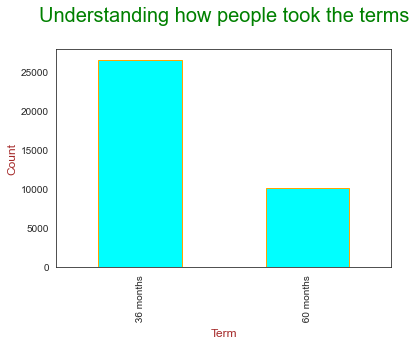

In [32]:
# plotting bar chart and setting bar aligning it to center
df_loan["term"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding how people took the terms\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [33]:
df_loan["int_rate"].value_counts() #we have to fix the data type string -> float

10.99%    901
13.49%    787
11.49%    772
7.51%     732
7.88%     674
         ... 
24.40%      1
22.94%      1
13.84%      1
16.96%      1
11.22%      1
Name: int_rate, Length: 334, dtype: int64

In [34]:
def remove_last_char_tofloat(x): # creating a generic function which will remove '%' and convert into flaot
    x = x[:-1]
    return float(x) 

In [35]:
#applying the function to columns
df_loan["int_rate"]=df_loan["int_rate"].apply(remove_last_char_tofloat)

In [36]:
df_loan["int_rate"].dtype

dtype('float64')

In [37]:
df_loan["int_rate"].describe()

count    36548.000000
mean        12.081942
std          3.735718
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

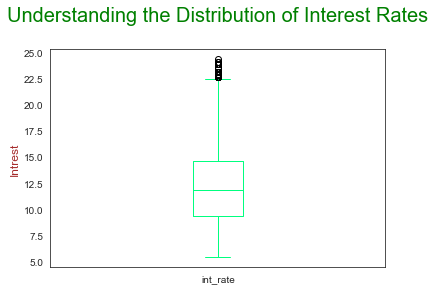

In [38]:
# plotting bar chart and setting bar aligning it to center
df_loan["int_rate"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of Interest Rates\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Intrest", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [39]:
df_loan["installment"].describe()

count    36548.000000
mean       325.860813
std        207.420129
min         16.080000
25%        168.730000
50%        282.955000
75%        431.682500
max       1305.190000
Name: installment, dtype: float64

In [40]:
df_loan= df_loan[df_loan["installment"] < 700] ## removing the ouliers 

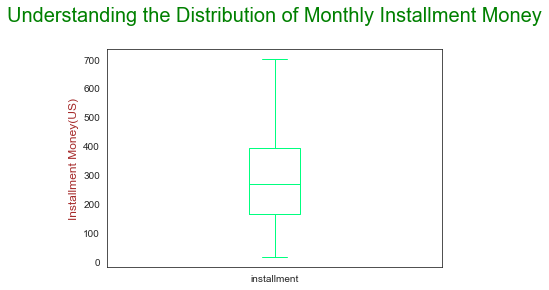

In [41]:
# plotting bar chart and setting bar aligning it to center
df_loan["installment"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of Monthly Installment Money\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Installment Money(US)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [42]:
df_loan["grade"].value_counts()

B    10436
A     8986
C     7132
D     4482
E     2267
F      765
G      216
Name: grade, dtype: int64

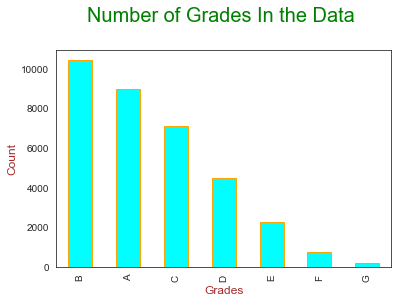

In [43]:
# plotting bar chart and setting bar aligning it to center
df_loan["grade"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Number of Grades In the Data \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Grades", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [44]:
df_loan["sub_grade"].value_counts()

A4    2576
B3    2498
A5    2461
B5    2377
B4    2183
C1    1847
C2    1790
B2    1783
A3    1608
B1    1595
C3    1376
A2    1336
D2    1166
C4    1085
C5    1034
A1    1005
D3     996
D4     819
D1     779
D5     722
E1     628
E2     541
E3     445
E4     358
E5     295
F1     244
F2     192
F3     136
F4     119
F5      74
G1      69
G2      53
G4      42
G3      34
G5      18
Name: sub_grade, dtype: int64

In [45]:
df_loan["emp_title"].value_counts()

US Army                                117
Bank of America                        104
IBM                                     56
Wells Fargo                             52
AT&T                                    52
                                      ... 
Jessamine County Board of Education      1
First Health Montgomery Hospital         1
Aegir Systems                            1
Intermark Group                          1
Fairfield Manufacturing                  1
Name: emp_title, Length: 26769, dtype: int64

In [46]:
df_loan["emp_title"].isna().sum()

0

In [47]:
df_loan["emp_title"].value_counts().describe()

count    26769.000000
mean         1.280735
std          1.925864
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        117.000000
Name: emp_title, dtype: float64

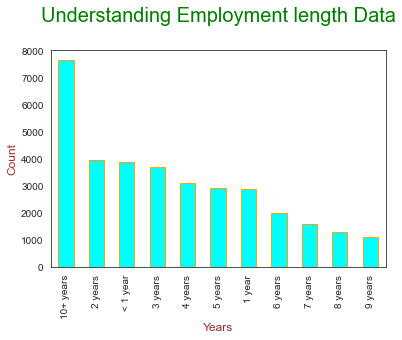

In [48]:
# plotting bar chart and setting bar aligning it to center
df_loan["emp_length"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Employment length Data\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [49]:
def clean_emp_year(x):
    x =  x.replace("years" , "")
    x =  x.replace("year" , "")
    x = x.replace("< 1" , "0")
    x = x.replace("+" , "")
    return int(x) 

In [50]:
df_loan["emp_length"] = df_loan["emp_length"].apply(clean_emp_year)#cleaning the data 

In [51]:
df_loan = df_loan[~(df_loan["home_ownership"] == "NONE")]# droping the rows with none

In [52]:
df_loan = df_loan[~(df_loan["home_ownership"] == "OTHER")]# droping the rows with Other value

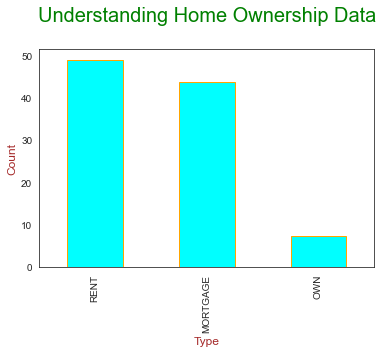

In [53]:
# plotting bar chart and setting bar aligning it to center
df_loan["home_ownership"].value_counts().apply(lambda x : x /df_loan["home_ownership"].shape[0]*100).plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Home Ownership Data\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [54]:
df_loan["annual_inc"].max()

6000000.0

In [55]:
df_loan["annual_inc"].min()

4000.0

<AxesSubplot:>

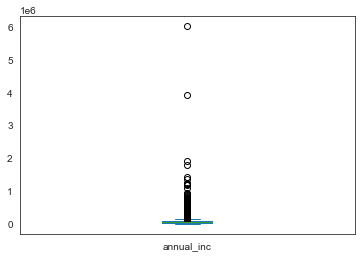

In [56]:
df_loan["annual_inc"].plot.box()

In [57]:
df_loan.shape # before droping the values

(34192, 54)

In [58]:
np.percentile(df_loan["annual_inc"],90)

109000.0

In [59]:
df_loan = df_loan[df_loan["annual_inc"] < 116000.0] # after droping the values 

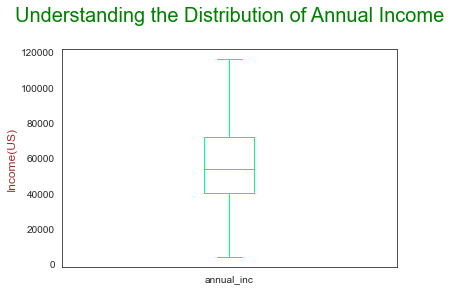

In [60]:
# plotting bar chart and setting bar aligning it to center
df_loan["annual_inc"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.ylabel("Income(US)", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

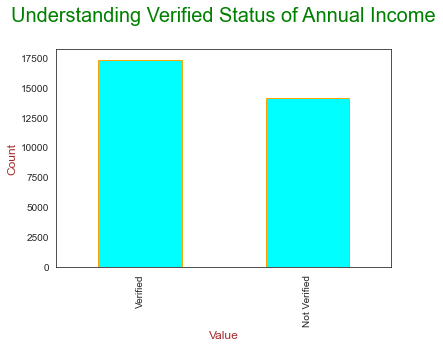

In [61]:
# plotting bar chart and setting bar aligning it to center
df_loan["verification_status"].apply(lambda x : "Verified" if x == "Source Verified" else x).value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Verified Status of Annual Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Value", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [62]:
df_loan["issue_d"].value_counts()

Dec-11    1819
Nov-11    1719
Sep-11    1589
Oct-11    1588
Aug-11    1521
Jul-11    1505
Jun-11    1458
May-11    1384
Apr-11    1261
Mar-11    1145
Jan-11    1143
Feb-11    1031
Dec-10    1025
Jul-10     960
Nov-10     937
Oct-10     928
Aug-10     919
Sep-10     905
Jun-10     869
May-10     752
Apr-10     671
Mar-10     574
Feb-10     487
Nov-09     461
Jan-10     427
Dec-09     427
Oct-09     417
Sep-09     383
Aug-09     348
Jul-09     309
Jun-09     305
May-09     268
Mar-09     249
Apr-09     245
Feb-09     222
Jan-09     202
Dec-08     179
Nov-08     154
Apr-08     130
Mar-08      99
Oct-08      77
Jul-08      74
May-08      63
Aug-08      61
Jun-08      56
Sep-08      27
Feb-08       6
Jan-08       6
Dec-07       2
Aug-07       2
Nov-07       1
Oct-07       1
Name: issue_d, dtype: int64

In [63]:
df_loan["issue_d_month"]=df_loan["issue_d"].apply(lambda x : x[:3])

In [64]:
df_loan["issue_d_year"] = df_loan["issue_d"].apply(lambda x : x[4:])

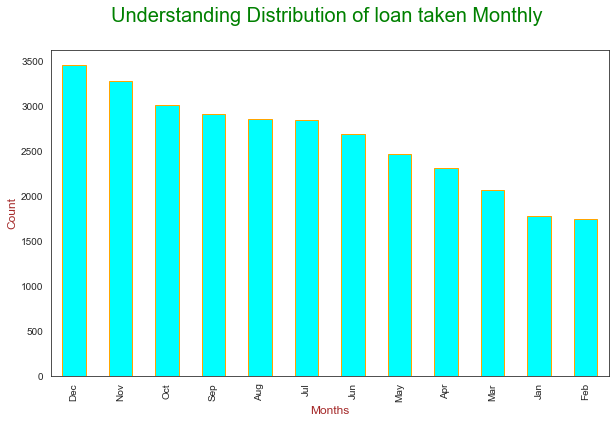

In [65]:
plt.figure(figsize = (10,6))

# plotting bar chart and setting bar aligning it to center
df_loan["issue_d_month"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Distribution of loan taken Monthly \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Months", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

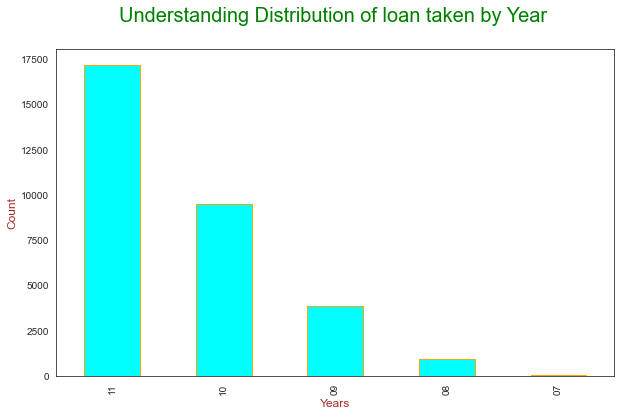

In [66]:
plt.figure(figsize = (10,6))

# plotting bar chart and setting bar aligning it to center
df_loan["issue_d_year"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Distribution of loan taken by Year \n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

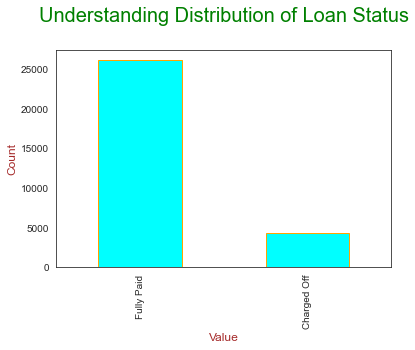

In [70]:
# plotting bar chart and setting bar aligning it to center
df_loan["loan_status"].value_counts().plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Understanding Distribution of Loan Status\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Value", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [68]:
df_loan=df_loan[df_loan["loan_status"] != "Current"] 
#removing the current values rows because they can pay full ammount so we can't find much Insigths

In [69]:
df_loan["pymnt_plan"].value_counts()

n    30517
Name: pymnt_plan, dtype: int64

In [71]:
df_loan = df_loan.drop("pymnt_plan" ,1)
df_loan.shape

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/2422071079.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan = df_loan.drop("pymnt_plan" ,1)


(30517, 55)

In [72]:
df_loan["url"][1]

'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430'

In [73]:
df_loan = df_loan.drop("url",1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/1158684657.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan = df_loan.drop("url",1)


In [74]:
df_loan.shape

(30517, 54)

In [75]:
df_loan["purpose"].value_counts()

debt_consolidation    14575
credit_card            3954
other                  3120
home_improvement       2036
major_purchase         1765
car                    1293
small_business         1071
wedding                 773
medical                 553
moving                  465
vacation                311
house                   273
educational             256
renewable_energy         72
Name: purpose, dtype: int64

In [76]:
df_loan = df_loan[~(df_loan["purpose"] == "renewable_energy")] # removing minimum number of columns

In [77]:
df_loan["title"].value_counts().describe()

count    15455.000000
mean         1.969330
std         19.349917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1675.000000
Name: title, dtype: float64

In [78]:
df_loan = df_loan.drop("title",1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/2800851925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan = df_loan.drop("title",1)


In [79]:
df_loan["zip_code"].value_counts()

112xx    413
945xx    410
606xx    407
100xx    397
070xx    348
        ... 
736xx      1
332xx      1
461xx      1
093xx      1
479xx      1
Name: zip_code, Length: 797, dtype: int64

In [80]:
df_loan["addr_state"].value_counts().describe()

count      49.000000
mean      621.326531
std       927.139404
min         1.000000
25%       123.000000
50%       351.000000
75%       660.000000
max      5383.000000
Name: addr_state, dtype: float64

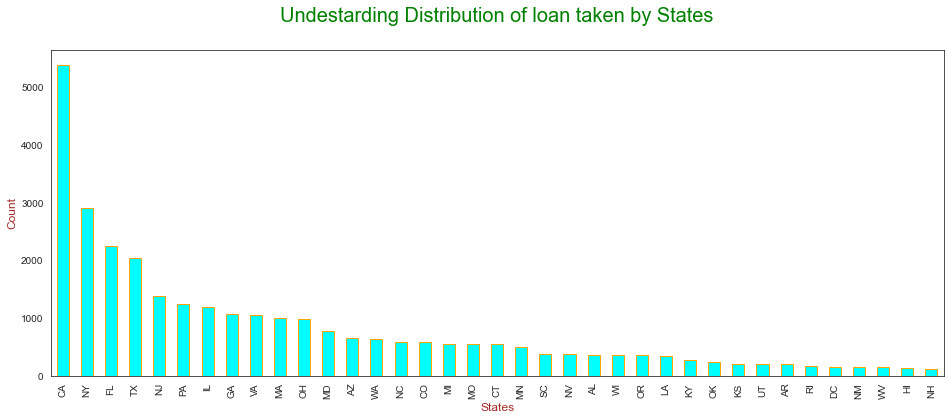

In [81]:
plt.figure(figsize = (16,6))

# plotting bar chart and setting bar aligning it to center
df_loan["addr_state"].value_counts()[df_loan["addr_state"].value_counts() > 117].plot.bar(align='center', edgecolor='Orange',color='cyan')

# Adding and formatting title
plt.title("Undestarding Distribution of loan taken by States\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("States", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [82]:
df_loan["dti"].describe()

count    30445.000000
mean        13.625501
std          6.659840
min          0.000000
25%          8.550000
50%         13.780000
75%         18.910000
max         29.990000
Name: dti, dtype: float64

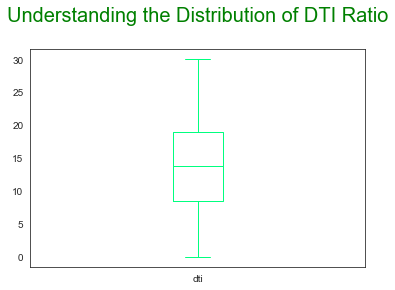

In [83]:
# plotting bar chart and setting bar aligning it to center
df_loan["dti"].plot.box(color='springgreen')

# Adding and formatting title
plt.title("Understanding the Distribution of DTI Ratio\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})


plt.show()

In [84]:
df_loan["delinq_2yrs"].describe()

count    30445.000000
mean         0.143340
std          0.489895
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [85]:
df_loan["delinq_2yrs"].value_counts()

0     27217
1      2478
2       507
3       164
4        45
5        17
6        10
7         4
8         2
11        1
Name: delinq_2yrs, dtype: int64

In [86]:
df_loan["earliest_cr_line"].value_counts()

Oct-99    302
Nov-98    296
Dec-98    284
Oct-00    283
Nov-00    276
         ... 
Dec-50      1
Jan-68      1
Aug-73      1
Aug-68      1
Jan-72      1
Name: earliest_cr_line, Length: 497, dtype: int64

In [87]:
df_loan["earliest_cr_line_year"]=df_loan["earliest_cr_line"].apply(lambda x : x[-2:])

In [88]:
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].apply(lambda x : x[:3])

<AxesSubplot:>

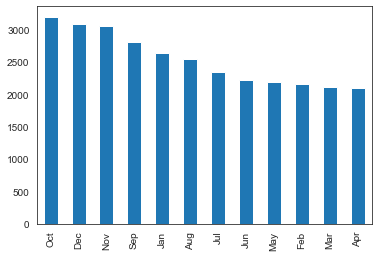

In [89]:
df_loan["earliest_cr_line"].value_counts().plot.bar()

<AxesSubplot:>

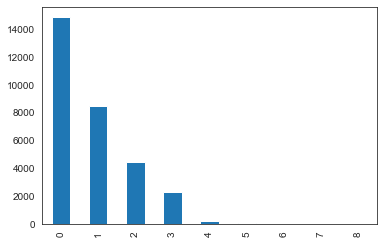

In [90]:
df_loan["inq_last_6mths"].value_counts().plot.bar()

In [91]:
df_loan["open_acc"].describe()

count    30445.000000
mean         9.071375
std          4.278636
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         38.000000
Name: open_acc, dtype: float64

In [92]:
df_loan["revol_util"].value_counts()

0%        701
46.40%     50
61%        49
32%        49
31.20%     48
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1073, dtype: int64

In [93]:
df_loan["revol_util"].apply(lambda x : x if type(x) == float else float(x[:-1]) )

1         9.4
3        21.0
5        28.3
6        85.6
7        87.5
         ... 
39551    96.5
39562    68.7
39623    62.9
39666    34.3
39680    70.9
Name: revol_util, Length: 30445, dtype: float64

In [94]:
df_loan["total_acc"].value_counts()

14    1192
15    1187
17    1181
13    1160
16    1156
      ... 
81       1
78       1
72       1
87       1
2        1
Name: total_acc, Length: 77, dtype: int64

In [95]:
df_loan["initial_list_status"].value_counts()

f    30445
Name: initial_list_status, dtype: int64

In [96]:
df_loan=df_loan.drop("initial_list_status",1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/2828246065.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop("initial_list_status",1)


In [97]:
df_loan.shape #current shape ofter droping the columns

(30445, 53)

In [98]:
df_loan["out_prncp"].value_counts()

0.0    30445
Name: out_prncp, dtype: int64

In [99]:
df_loan=df_loan.drop("out_prncp_inv",1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/2320966075.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop("out_prncp_inv",1)


In [100]:
df_loan.shape # current shape ofter droping the columns

(30445, 52)

In [101]:
df_loan["out_prncp"].value_counts()

0.0    30445
Name: out_prncp, dtype: int64

In [102]:
df_loan=df_loan.drop("total_pymnt_inv",1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/4187671026.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop("total_pymnt_inv",1)


In [103]:
df_loan.shape # current shape ofter droping the column

(30445, 51)

In [104]:
df_loan=df_loan.drop("total_rec_prncp",1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/645107226.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop("total_rec_prncp",1)


In [105]:
df_loan.shape # current shape ofter droping the columns

(30445, 50)

In [106]:
df_loan["total_rec_int"].value_counts()

0.00       59
1196.57    23
1784.23    15
717.95     15
1148.14    14
           ..
21.50       1
1459.31     1
3027.73     1
240.40      1
579.66      1
Name: total_rec_int, Length: 27094, dtype: int64

In [107]:
df_loan["total_rec_late_fee"].value_counts()

0.000000     28930
15.000000      201
15.000000       48
30.000000       42
15.000000       38
             ...  
23.230000        1
29.955775        1
14.930384        1
19.940000        1
52.262227        1
Name: total_rec_late_fee, Length: 952, dtype: int64

In [108]:
df_loan[df_loan["recoveries"] > 0]["recoveries"].describe()

count     3269.000000
mean       718.601502
std       1466.019008
min          6.300000
25%        101.320000
50%        299.310000
75%        710.020000
max      21810.310000
Name: recoveries, dtype: float64

In [109]:
df_loan["collection_recovery_fee"].value_counts()

0.0000      27521
2.0000         10
1.2000          9
1.6900          8
0.8000          8
            ...  
155.0340        1
4.1815          1
340.0000        1
258.9138        1
668.3600        1
Name: collection_recovery_fee, Length: 2048, dtype: int64

In [110]:
df_loan["last_pymnt_d"].value_counts()

Mar-13    826
Dec-14    756
May-13    730
Feb-13    698
Mar-12    695
         ... 
Aug-08      5
Sep-08      5
May-08      4
Nov-08      4
Jun-08      2
Name: last_pymnt_d, Length: 97, dtype: int64

In [111]:
df_loan["last_pymnt_d_year"]=df_loan["last_pymnt_d"].apply(lambda x : x if type(x) == float else x[-2:])

In [112]:
df_loan["last_pymnt_d"]=df_loan["last_pymnt_d"].apply(lambda x : x if type(x) == float else x[:3])

<AxesSubplot:>

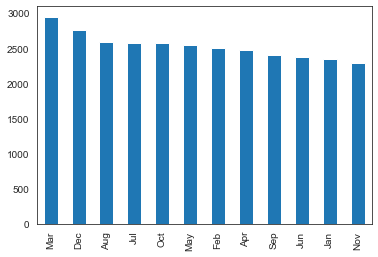

In [113]:
df_loan["last_pymnt_d"].value_counts().plot.bar()

In [114]:
df_loan["last_pymnt_amnt"].describe()

count    30445.000000
mean      2394.332158
std       3743.515735
min          0.000000
25%        207.570000
50%        508.780000
75%       3160.730000
max      30340.500000
Name: last_pymnt_amnt, dtype: float64

In [115]:
df_loan=df_loan.drop("collections_12_mths_ex_med",1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/3860708942.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop("collections_12_mths_ex_med",1)


In [116]:
df_loan.shape # current shape ofter droping the columns

(30445, 50)

In [117]:
df_loan=df_loan.drop("policy_code",1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/283775170.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop("policy_code",1)


In [118]:
df_loan.shape # current shape ofter droping the columns

(30445, 49)

In [119]:
df_loan=df_loan.drop("application_type",1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/331095300.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop("application_type",1)


In [120]:
df_loan.shape # current shape ofter droping the columns

(30445, 48)

In [121]:
df_loan=df_loan.drop("acc_now_delinq",1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/2315990688.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop("acc_now_delinq",1)


In [122]:
df_loan=df_loan.drop('chargeoff_within_12_mths',1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/427273591.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop('chargeoff_within_12_mths',1)


In [123]:
df_loan=df_loan.drop('delinq_amnt',1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/1329167732.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop('delinq_amnt',1)


In [124]:
df_loan=df_loan.drop('tax_liens',1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/1887018394.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop('tax_liens',1)


In [125]:
df_loan.shape # current shape ofter droping the columns

(30445, 44)

In [126]:
Customer_behaviour_data = ['delinq_2yrs', "earliest_cr_line" ,'earliest_cr_line_year' , "inq_last_6mths" , "open_acc"  , "pub_rec" , "revol_bal" , 
                            "revol_util", "total_acc","out_prncp","total_pymnt","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
                                "last_pymnt_d",'last_pymnt_d_year',"last_pymnt_amnt","last_credit_pull_d"] 

In [127]:
df_loan=df_loan.drop(Customer_behaviour_data,1)

C:\Users\rakes\AppData\Local\Temp/ipykernel_19848/3488273602.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_loan=df_loan.drop(Customer_behaviour_data,1)


In [128]:
df_loan.shape

(30445, 25)

In [129]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'loan_approval', 'issue_d_month',
       'issue_d_year'],
      dtype='object')

In [130]:
df_loan.columns #left columns which we can do bivarient analysis

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'loan_approval', 'issue_d_month',
       'issue_d_year'],
      dtype='object')

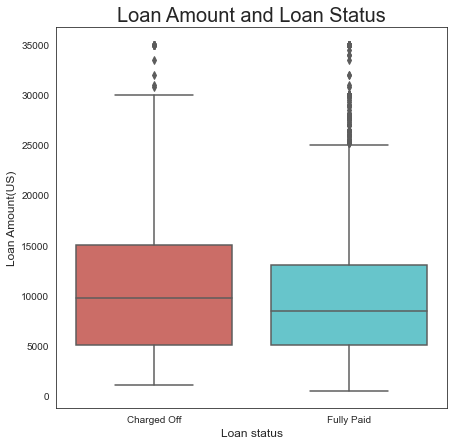

In [131]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="loan_amnt", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Loan Amount(US)", fontsize=12)
plt.title("Loan Amount and Loan Status", fontsize=20)

plt.show()

In [132]:
term_loanstatus = pd.crosstab(index=df_loan['term'], columns=df_loan['loan_status'], normalize=0).reset_index()
term_loanstatus

loan_status,term,Charged Off,Fully Paid
0,36 months,0.106806,0.893194
1,60 months,0.252747,0.747253


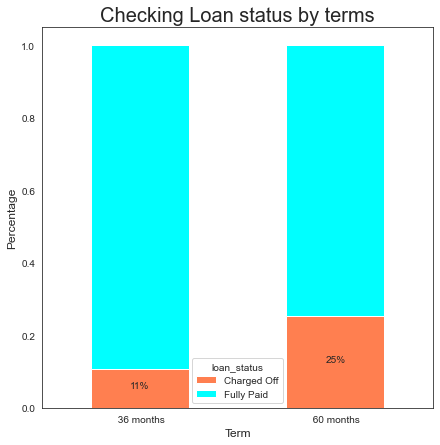

In [133]:
#create stacked bar chart
term_loanstatus.set_index('term').plot(kind='bar', stacked=True, color=['coral','aqua'] ,figsize=(7,7))

for idx, row in term_loanstatus.iterrows():
    plt.text(idx-.05, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))

plt.xticks(rotation=0)

plt.xlabel("Term", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Checking Loan status by terms", fontsize=20)

plt.show()

In [134]:
df_loan_intrest =df_loan.groupby('loan_status').agg({'int_rate': 'median'})

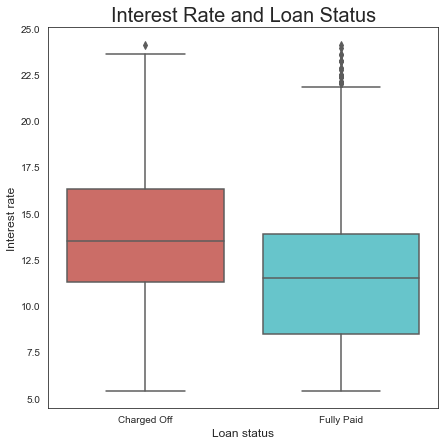

In [135]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="int_rate", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Interest rate", fontsize=12)
plt.title("Interest Rate and Loan Status", fontsize=20)


plt.show()

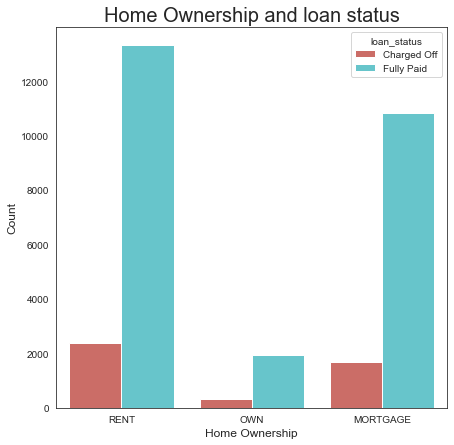

In [136]:
plt.figure(figsize = (7,7))


sns.countplot(x="home_ownership" ,data=df_loan, hue="loan_status" , palette="hls")
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Home Ownership and loan status", fontsize=20)


plt.show()

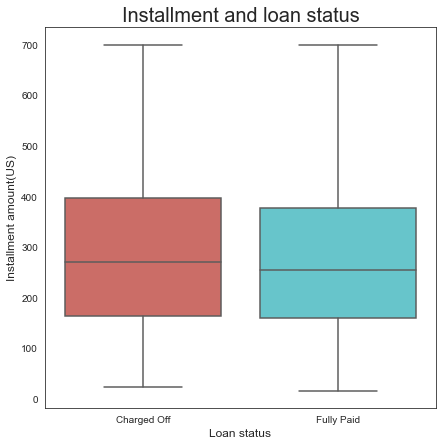

In [137]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="installment", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Installment amount(US)", fontsize=12)
plt.title("Installment and loan status", fontsize=20)


plt.show()

In [138]:
grade_loanstatus = pd.crosstab(index=df_loan['grade'], columns=df_loan['loan_status'], normalize=0).reset_index()
grade_loanstatus

loan_status,grade,Charged Off,Fully Paid
0,A,0.059585,0.940415
1,B,0.121609,0.878391
2,C,0.172109,0.827891
3,D,0.219618,0.780382
4,E,0.273166,0.726834
5,F,0.322169,0.677831
6,G,0.389535,0.610465


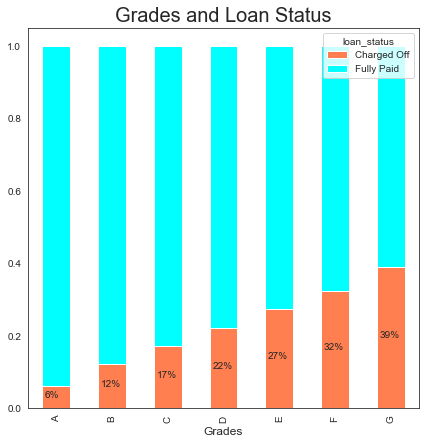

In [139]:
#create stacked bar chart
grade_loanstatus.set_index('grade').plot(kind='bar', stacked=True, color=['coral','aqua'],figsize=(7,7))

for idx, row in grade_loanstatus.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
plt.xlabel("Grades", fontsize=12)
plt.title("Grades and Loan Status", fontsize=20)
plt.show()

In [140]:
subgrade_loanstatus = pd.crosstab(index=df_loan['sub_grade'], columns=df_loan['loan_status'], normalize=0).reset_index()
subgrade_loanstatus.head()

loan_status,sub_grade,Charged Off,Fully Paid
0,A1,0.025471,0.974529
1,A2,0.050162,0.949838
2,A3,0.050204,0.949796
3,A4,0.060670,0.939330
4,A5,0.083784,0.916216


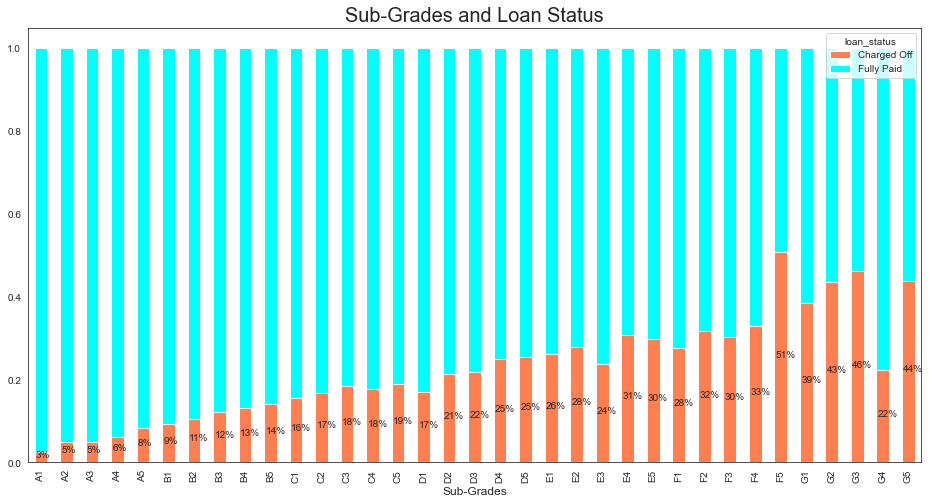

In [141]:
#create stacked bar chart

axes = subgrade_loanstatus.set_index('sub_grade').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for i, row in subgrade_loanstatus.iterrows():
    plt.text(i-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 8))
plt.xlabel("Sub-Grades", fontsize=12)
plt.title("Sub-Grades and Loan Status", fontsize=20)
plt.show()

In [142]:
def bucket(x): # creating buckets for getting more insights
    if(x==0):
        return "Fresher"
    elif(x>=1 and x<3):
        return "1-3"
    elif(x>=3 and x<5):
        return "3-5"
    elif(x>=5 and x<7):
        return "5-7"
    elif(x>=7 and x<10):
        return "7-10"
    elif(x>=10):
        return "10+"
        

In [143]:
df_loan["emp_length_buckets"]=df_loan.emp_length.apply(bucket)

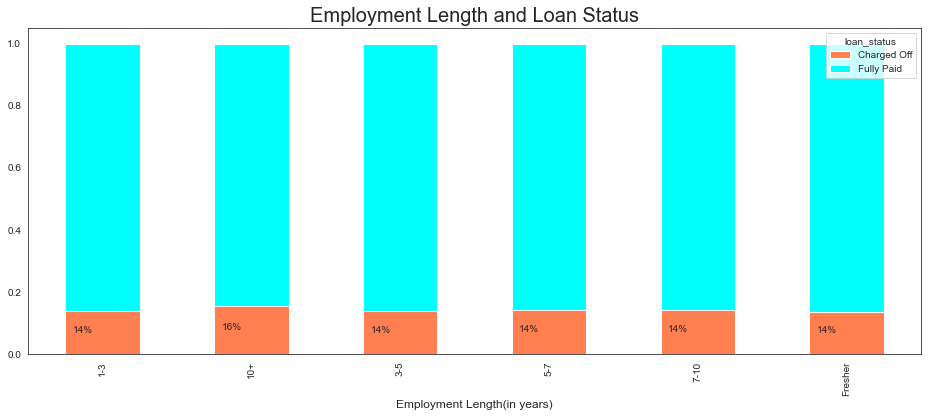

In [144]:
crosstab_emplen_status = pd.crosstab(index=df_loan['emp_length_buckets'], columns=df_loan['loan_status'], normalize=0).reset_index()
#create stacked bar chart

axes = crosstab_emplen_status.set_index('emp_length_buckets').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for idx, row in crosstab_emplen_status.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 6))
plt.xlabel("Employment Length(in years)", fontsize=12)
plt.title("Employment Length and Loan Status", fontsize=20)
plt.show()

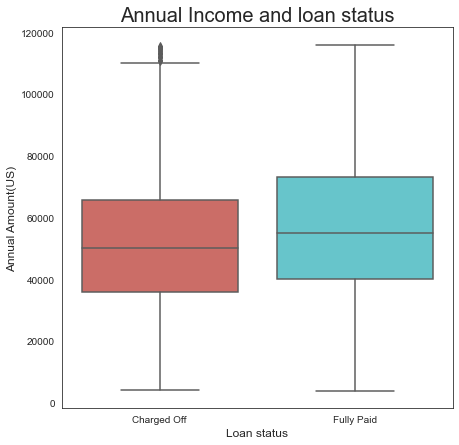

In [145]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="annual_inc", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("Annual Amount(US)", fontsize=12)
plt.title("Annual Income and loan status", fontsize=20)


plt.show()

In [146]:
crosstab_purpose_status = pd.crosstab(index=df_loan['purpose'], columns=df_loan['loan_status'], normalize=0).reset_index()
crosstab_purpose_status

loan_status,purpose,Charged Off,Fully Paid
0,car,0.109049,0.890951
1,credit_card,0.105716,0.894284
2,debt_consolidation,0.151767,0.848233
3,educational,0.167969,0.832031
4,home_improvement,0.119843,0.880157
5,house,0.153846,0.846154
6,major_purchase,0.101983,0.898017
7,medical,0.157324,0.842676
8,moving,0.161290,0.838710
9,other,0.158333,0.841667


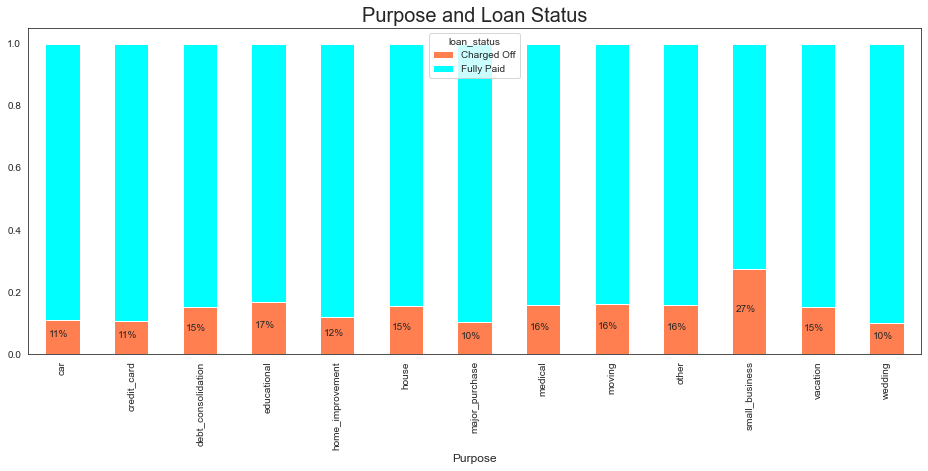

In [147]:
#create stacked bar chart

axes = crosstab_purpose_status.set_index('purpose').plot(kind='bar', stacked=True, color=['coral','aqua'])

# extract the figure object
fig = axes.get_figure()

for idx, row in crosstab_purpose_status.iterrows():
    plt.text(idx-.2, row['Charged Off']/2, "{:.0%}".format(row['Charged Off']))
    
fig.set_size_inches((16, 6))
plt.xlabel("Purpose", fontsize=12)
plt.title("Purpose and Loan Status", fontsize=20)
plt.show()

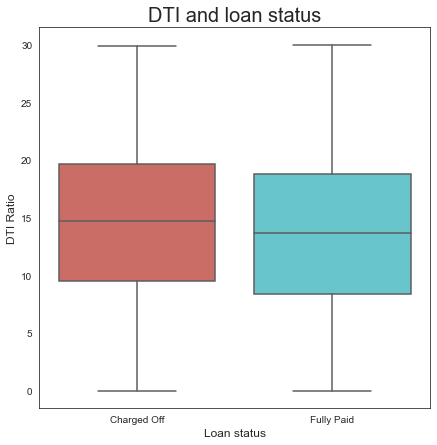

In [148]:
plt.figure(figsize = (7,7))


sns.boxplot(x="loan_status",y="dti", data=df_loan,palette="hls")
plt.xlabel("Loan status", fontsize=12)
plt.ylabel("DTI Ratio", fontsize=12)
plt.title("DTI and loan status", fontsize=20)


plt.show()

In [149]:
bankrupt_loanstatus = pd.crosstab(index=df_loan['pub_rec_bankruptcies'], columns=df_loan['loan_status'], normalize=0).reset_index()
bankrupt_loanstatus

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid
0,0.0,0.139829,0.860171
1,1.0,0.211553,0.788447
2,2.0,0.400000,0.600000


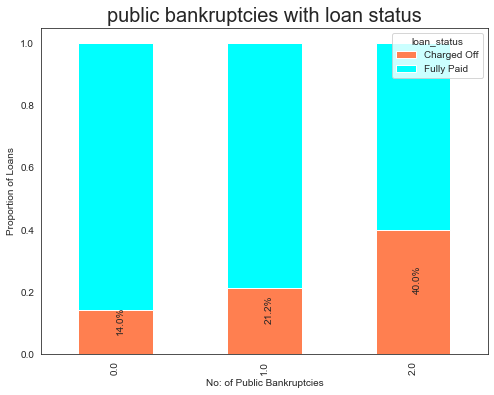

In [150]:
#creating stacked bar chart

axes = bankrupt_loanstatus.set_index('pub_rec_bankruptcies').plot(kind='bar', stacked=True, color=['coral','aqua'])

# figure object extraction
fig = axes.get_figure()

for i, row in bankrupt_loanstatus.iterrows():
    plt.text(i, row['Charged Off']/2, "{:.1%}".format(row['Charged Off']), rotation=90)

plt.xlabel('No: of Public Bankruptcies')
plt.ylabel('Proportion of Loans')

fig.set_size_inches((8, 6))
plt.title("public bankruptcies with loan status", fontsize=20)
plt.show()